In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import summarize_average_models_dot_boundary

In [3]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"

In [4]:
models_number = 8

In [5]:
df = summarize_average_models_dot_boundary(data_dir, models_number, ignore_keys=["insertion_SCD", "disruption_SCD"])

## Correlation between boundary and dot SCD

Text(0.95, 0.05, 'PearsonR = 0.9955')

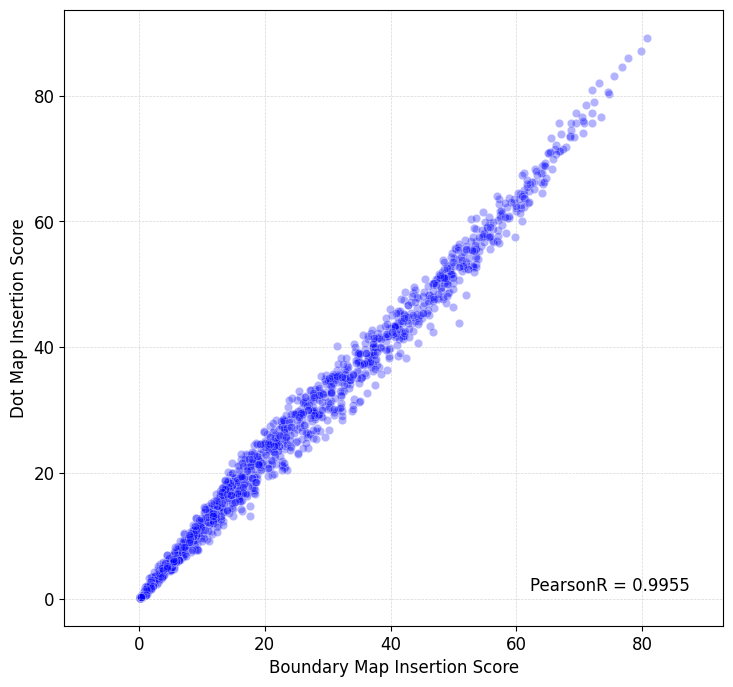

In [6]:
# Create a scatter plot
plt.figure(figsize=(8.5, 8))
plt.scatter(df["SCD_B"], df["SCD_D"], alpha=0.3, edgecolors='w', linewidth=0.5, color='blue')
plt.ylabel('Dot Map Insertion Score')
plt.xlabel('Boundary Map Insertion Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axis('equal')

# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(df["SCD_B"], df["SCD_D"])
rounded_pearson_corr = round(pearson_corr, 4)

# Add Pearson correlation coefficient in the lower right corner
plt.text(0.95, 0.05, f'PearsonR = {rounded_pearson_corr}', horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12, color='black')

# plt.savefig("./plots/boundary_dot_insertion_score.pdf", format="pdf", bbox_inches="tight")

## Boundary SCD vs. cross-score

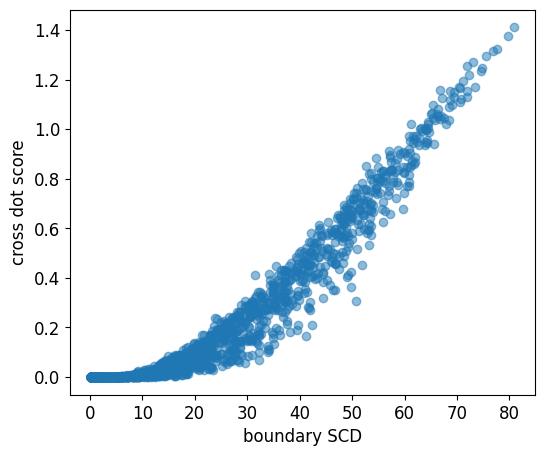

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["cross-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

# plt.savefig("./plots/boundarySCD_vs_cross-score.png", bbox_inches="tight")

plt.show()


## Boundary-SCD vs. dot-score

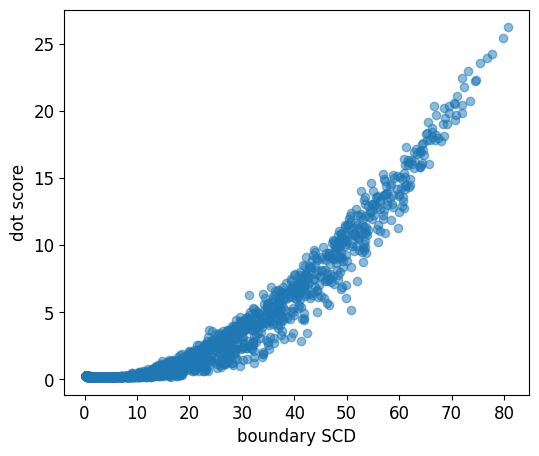

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["dot-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot score")

# plt.savefig("./plots/boundarySCD_vs_dot-score.png", bbox_inches="tight")

plt.show()

## Boundary-SCD vs. x-score

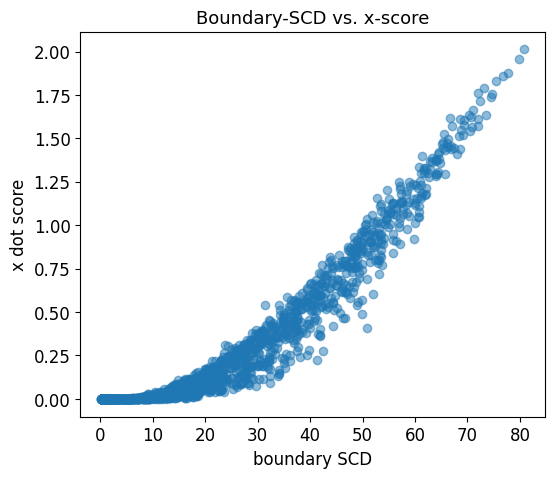

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["x-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("x dot score")

ax.set_title("Boundary-SCD vs. x-score")

# plt.savefig("./plots/boundarySCD_vs_x-score.png", bbox_inches="tight")

plt.show()

## Scatterplot with histograms on the margins

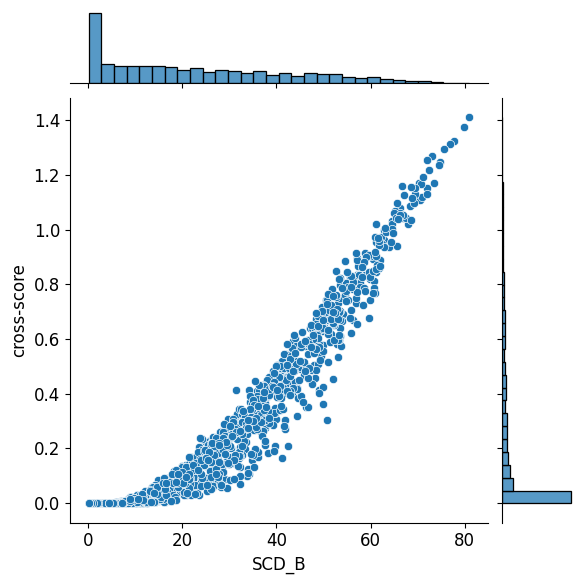

In [10]:
sns.jointplot(
    x=df["SCD_B"], y=df["cross-score"], marginal_kws=dict(bins=30, fill=True),
)

## Picking a representative (visually) set of points to plot them

In [14]:
picked_indiced = [1326, 412, 368, 101, 10, 112]

In [15]:
picked_for_plotting = df.loc[picked_indiced].reset_index(drop=True)

In [16]:
picked_for_plotting

,chrom,end,start,strand,SCD_m0_B,SCD_m0_D,dot-score_m0,cross-score_m0,x-score_m0,SCD_m1_B,...,SCD_m7_B,SCD_m7_D,dot-score_m7,cross-score_m7,x-score_m7,SCD_B,SCD_D,dot-score,cross-score,x-score
0,chr11,30240273,30240254,+,0.298828,0.300293,0.169922,0.000123,0.000276,0.32251,...,0.810059,0.687988,0.646484,0.000094,0.000375,0.392334,0.358643,0.223389,-0.000067,-0.000221
1,chr10,52106337,52106318,+,24.218750,27.968750,1.271484,0.079285,0.102234,40.06250,...,26.718750,28.093750,2.042969,0.079651,0.108398,27.531250,29.859375,1.873047,0.114197,0.149292
2,chr17,93141334,93141315,-,38.062500,39.000000,5.000000,0.342041,0.439941,54.06250,...,43.187500,43.031250,6.523438,0.365479,0.496582,40.718750,43.531250,6.449219,0.414795,0.545898
3,chr17,83271696,83271677,+,53.812500,54.000000,11.484375,0.749512,0.995117,45.81250,...,50.812500,50.750000,8.890625,0.513672,0.699219,48.125000,51.937500,9.984375,0.631836,0.843262
4,chr9,103996726,103996707,-,69.625000,67.625000,17.781250,1.087891,1.483398,64.62500,...,69.125000,78.562500,19.343750,1.119141,1.548828,62.875000,68.375000,16.906250,0.999023,1.372070
5,chr13,109213188,109213169,-,77.750000,78.625000,22.781250,1.318359,1.838867,71.87500,...,75.375000,84.187500,21.609375,1.242188,1.726562,71.062500,78.437500,21.109375,1.193359,1.666016


In [ ]:
# saving
# picked_for_plotting.to_csv("picked_for_plotting.tsv", sep="\t", index=False)

In [17]:
picked_colors = ["#fef0d9", "#fdbb84", "#fc8d59", "#ef6548", "#d7301f", "#990000"]

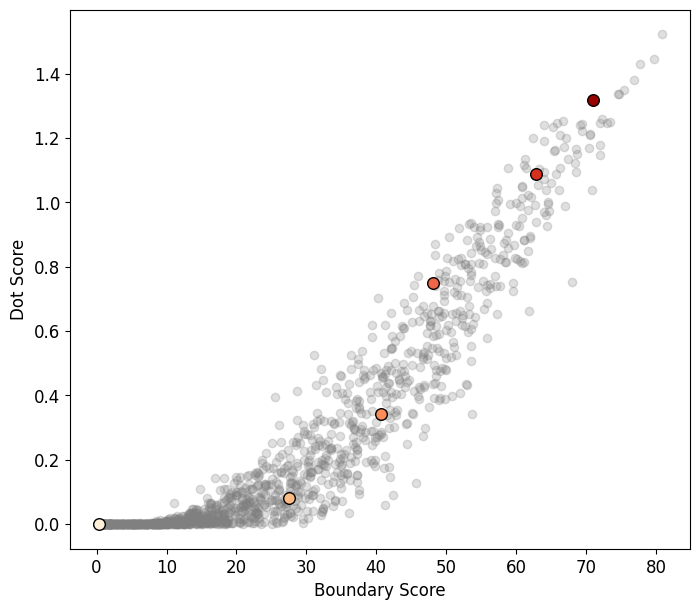

In [18]:
fig, ax = plt.subplots(figsize=(8,7))

scatter = ax.scatter(df["SCD_B"], df["cross-score_m0"], c = "gray", alpha=0.25)

for index in picked_indiced:
    color_ind = picked_indiced.index(index)
    scatter = ax.scatter(df["SCD_B"].iloc[index], df["cross-score_m0"].iloc[index], c=picked_colors[color_ind], s=70, edgecolors='black')

# for index in picked_indiced:
#     color_ind = picked_indiced.index(index)
#     idx = picked_indiced.index(index)
#     # ID = f"{df.chrom.iloc[index]}; {df.start.iloc[index]}-{df.end.iloc[index]}"
#     plt.text(df["SCD_B"].iloc[index]+1.1, df["cross-score_m0"].iloc[index]-0.025, labels[idx], horizontalalignment='left', color="black", fontsize=20)

ax.set_xlabel("Boundary Score")
ax.set_ylabel("Dot Score")

# plt.savefig("./plots/boundary_dot_score_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()